In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [71]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-10-27 17:32:30--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-27 17:32:30 (31.3 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [81]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [82]:
COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.scatter(X, Y);

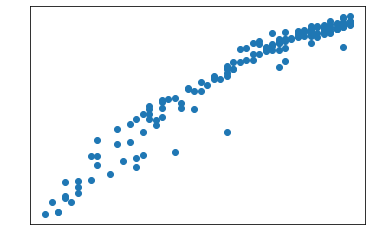

In [83]:
Y = np.log(y)
plt.scatter(X, y);

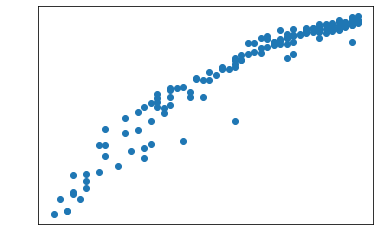

In [84]:
X = X - X.mean()
plt.scatter(X, Y);

In [97]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(.001, .9), loss='mse')

def schedule(epoch, lr):
    if epoch >= 50:
        return .0001
    return .001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=100, callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 102.7286
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 48.4685
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 31.1628
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 13.2451
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 7.5430
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 3.7813
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 1.4669
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9604
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 0.2984
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 0.1616
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0765
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 13/100
6/6 [==============================] - 0s 1

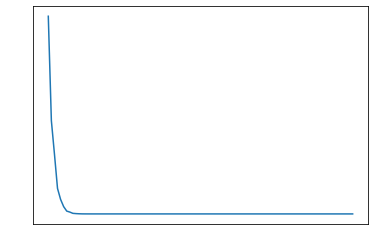

In [98]:
plt.plot(r.history['loss'], label='loss');

In [99]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.0086047]], dtype=float32), array([0.02678372], dtype=float32)]


In [100]:
a = model.layers[0].get_weights()[0][0,0]

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [101]:
print("Time for C to double:", np.log(2) / a)

Time for C to double: 80.55452265947208


In [102]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.008731059451888804 0.026597139144522584
Time to double: 79.38866805104571


# Pt 2: Making Predictions

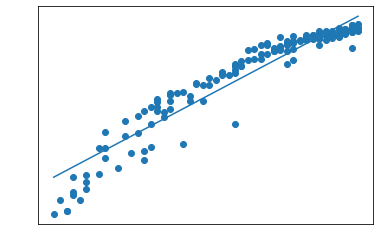

In [103]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat);

In [104]:
w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True